This notebook contains the code and visualizations for the Capstone 1 Storytelling assignment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker #need?
import seaborn as sns  #need?
from pylab import savefig
from datetime import datetime
from pandas.plotting import table 

#The plots have to be made with large fonts to be legible
#when imported into a Google doc
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)
#for applying singly if using default style
text_size = 18

#read in the final dataframe used for analysis after data wrangling
working_file_path = '/Users/alexia/Documents/Springboard/Capstone1/Cap1testing/'
working_file = working_file_path + 'final_20190918-152744.csv'
col_info_file = working_file_path + 'Extract9ColMapping.csv'
df_final = pd.read_csv(working_file, index_col = 'YEAR') 
df_final.index = pd.to_datetime(df_final.index, format='%Y')

#for analysis of hypertension, create a filtered dataset 
#where respondent stated they were told they had hypertension
HTN_column = "Ever told had hypertension"
df_HTN = df_final[df_final[HTN_column]==2]

def pct_2portion_plot(x_vals, y1, y2, xtext_rotation, fig_height, fig_width, plt_title, filename, plot_horizontal=False):
    """plot a two-portion (yes/no) percent stacked bar chart
    Keyword arguments:
    x_vals -- array of values for x-axis
    y1 -- array of values for bottom portion
    y2 -- array of values for top portion
    xtext_rotation -- degrees to rotate labels on x axis
    fig_height -- height of figure
    fig_width -- width of figure
    plt_title -- title to use for plot
    filename -- name of file to save plot
    plot_horizontal -- boolean for horizontal/vertical lines, default is vertical
    """
    #calculate total 
    snum = y1+y2
    #normalize
    y1 = y1/snum*100
    y2 = y2/snum*100

    plt.figure(figsize=(fig_width,fig_height))
    plt.title(plt_title, size = text_size)

    if plot_horizontal:
        # create bars
        plt.barh(x, y1, label='Yes', color='red')
        plt.barh(x, y2, left=y1,label='No', color='green')

        #reverse xpos & ypos in text setting for horizontal plot
        for xpos, ypos, yval in zip(x, y1/2, y1):
            plt.text(ypos, xpos, "%.1f"%yval + "%", ha="center", va="center", 
                     size = text_size, color = 'white', weight = 'bold')

        ax.invert_yaxis()
        ax.set_xlabel('Percentage of Respondents')
    else:
        # create bars
        plt.bar(x, y1, label='Yes', color='red')
        plt.bar(x, y2 ,bottom=y1,label='No', color='green')

        #add text showing percentage of each segment
        #bottom half of the bars = y1 / 2
        for xpos, ypos, yval in zip(x, y1/2, y1):
            plt.text(xpos, ypos, "%.1f"%yval + "%", ha="center", va="center", 
                     size = text_size, color = 'white', weight = 'bold')
            
        ax.set_ylabel('Percentage of Respondents')
        
    plt.xticks(size = text_size, rotation=xtext_rotation)
    plt.yticks(size=text_size)
    plt.savefig(filename, bbox_inches='tight', pad_inches=0.02)
    plt.show()


## Q1: Is there a trend in hypertension prevalence over time? 

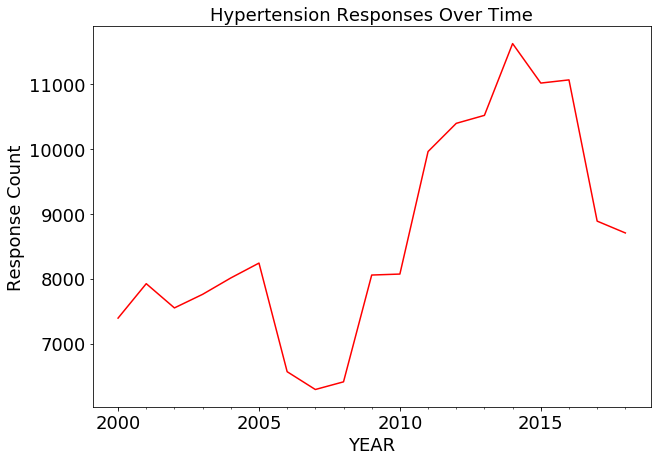

In [5]:
#group the responses by year and count the number of responses 
df_HTN_by_year = df_HTN.groupby(level=0, axis=0).count()[HTN_column]

fig, ax = plt.subplots(figsize=(10,7))
ax = df_HTN_by_year.plot(color = 'r')
ax.set_title('Hypertension Responses Over Time', size = text_size)
ax.set_ylabel('Response Count', size = text_size)
plt.savefig('non_normalized_HTN_prevalence.png', bbox_inches='tight', pad_inches=0.02)
plt.show()


#### Whoah, what does this mean?  Could this be influenced by the sample sizes?

### Examine the sample sizes in the data-wrangled dataset and the original dataset

/Users/alexia/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


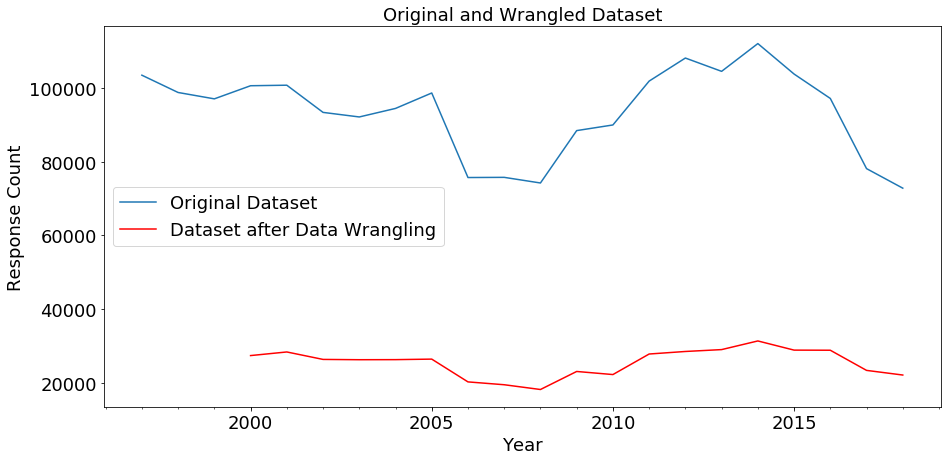

In [7]:
unfiltered_file = working_file_path + 'nhis_00010.csv'
df_uf = pd.read_csv(unfiltered_file, index_col = 'YEAR')
df_uf.index = pd.to_datetime(df_uf.index, format='%Y')

fig, ax = plt.subplots(figsize=(15,7))
ax = df_uf.index.value_counts().sort_index().plot()
df_final.index.value_counts().sort_index().plot(ax=ax, color='r')
ax.set_title('Original and Wrangled Dataset', size = text_size)
ax.set_ylabel('Response Count', size = text_size)
ax.set_xlabel('Year', size = text_size)
ax.legend(["Original Dataset", "Dataset after Data Wrangling"])
plt.savefig('original_final_datasets.png', bbox_inches='tight', pad_inches=0.02)
plt.show()

#### This shows marked variability in sample sizes, which means time series analysis will have to be normalized over sample sizes.  It also reveals that the first three years of data were lost after wrangling. 

Because the sample sizes differ from year to year, we need to plot the percent of hypertension in the sample size 
in order to evaluate if there is any trend in hypertension over time.

To plot this, we need the data in the form of 

Year |  Total Responses  |  % Hypertension Positive Responses

In [9]:
#we have year & total responses in value_counts for the whole dataframe
total_responses_by_year = df_final.index.value_counts().sort_index()
response_counts = total_responses_by_year.values.tolist()

#create a dataframe with the number of responses that indicated hypertension per year
df_HTN_by_year = df_HTN.groupby(level=0, axis=0).count()[HTN_column].reset_index()

#add a column with the total responses per year 
df_HTN_by_year['total_responses_per_year'] = response_counts

#calculate the percentage of responses indicating hypertension in the total responses per year
df_HTN_by_year = df_HTN_by_year.assign(pct_htn = df_HTN_by_year[HTN_column] / df_HTN_by_year['total_responses_per_year'])

#examine the data
df_HTN_by_year.head()


,YEAR,Ever told had hypertension,total_responses_per_year,pct_htn
0,2000-01-01,7391,27419,0.269558
1,2001-01-01,7921,28399,0.278918
2,2002-01-01,7548,26376,0.286169
3,2003-01-01,7757,26296,0.294988
4,2004-01-01,8009,26317,0.304328


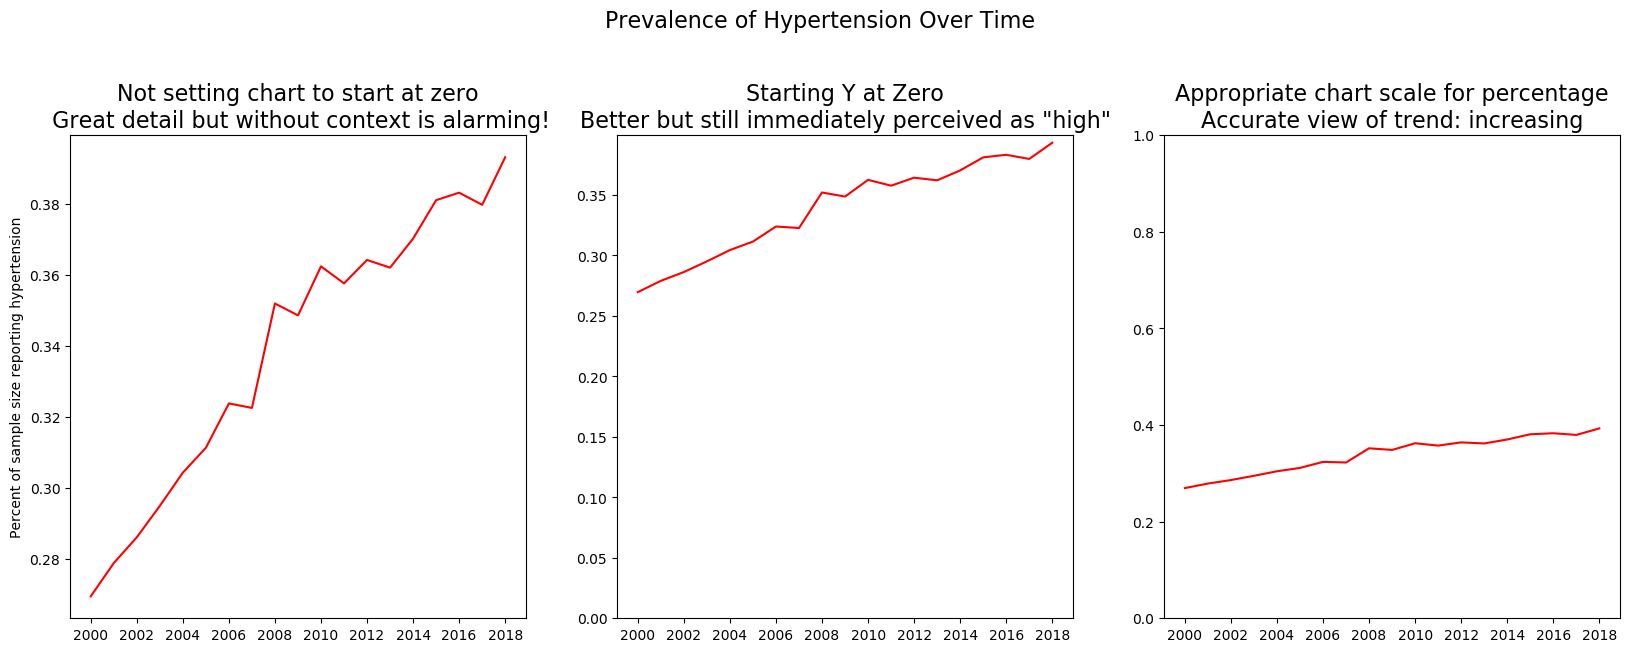

In [12]:
#plot the results
plt.style.use('default') 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,7), sharex = True)
fig.suptitle("Prevalence of Hypertension Over Time", size=16)
fig.subplots_adjust(top = 0.80, hspace = 0.5)

#if we don't start Y at zero, the results look extreme
axes[0].plot('YEAR', 'pct_htn', data=df_HTN_by_year, color= 'r')
axes[0].set_ylabel('Percent of sample size reporting hypertension')
axes[0].set_title('Not setting chart to start at zero\n Great detail but without context is alarming!', size = 16)

#starting Y at zero
axes[1].plot('YEAR', 'pct_htn', data=df_HTN_by_year, color= 'r')
axes[1].set_title('Starting Y at Zero\nBetter but still immediately perceived as "high"', size = 16)
axes[1].set_ylim(bottom=0)

#because this is a percentage, make the top = 1 to show the appropriate scale and further clarify results
axes[2].plot('YEAR', 'pct_htn', data=df_HTN_by_year, color= 'r')
axes[2].set_title('Appropriate chart scale for percentage\nAccurate view of trend: increasing', size = 16)
axes[2].set_ylim(bottom=0)
axes[2].set_ylim(top=1)


plt.savefig('normalized_HTN_prevalence.png', bbox_inches='tight', pad_inches=0.02)
plt.show()

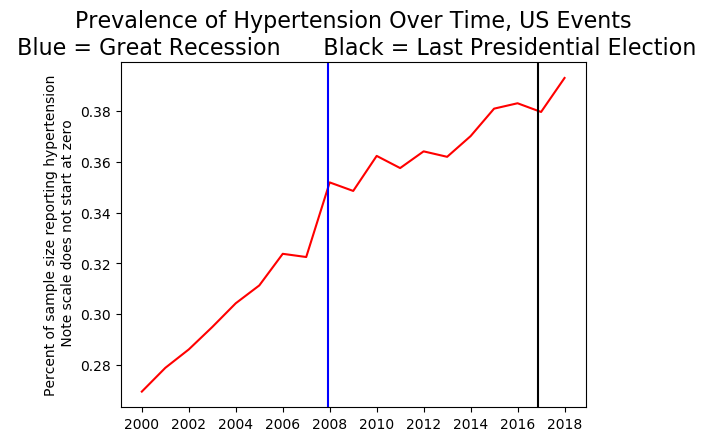

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,5), sharex = True)
#fig.suptitle("Prevalence of Hypertension Over Time, US Events", size=16)
fig.subplots_adjust(top = 0.80, hspace = 0.5)

axes.plot('YEAR', 'pct_htn', data=df_HTN_by_year, color= 'r')
axes.set_ylabel('Percent of sample size reporting hypertension\n Note scale does not start at zero')
axes.set_title('Prevalence of Hypertension Over Time, US Events\n Blue = Great Recession      Black = Last Presidential Election', size = 16)

plt.axvline(x='2007-12-01',color='blue') #Great Recession
plt.axvline(x='2016-11-08',color='black') #Last Presidential Election

plt.savefig('HTN_prevalence_US_Events.png', bbox_inches='tight', pad_inches=0.02)
plt.show()

## Q2: Is there a relationship between hypertension and income?¶

Start by looking at income distribution for all people and people with hypertension

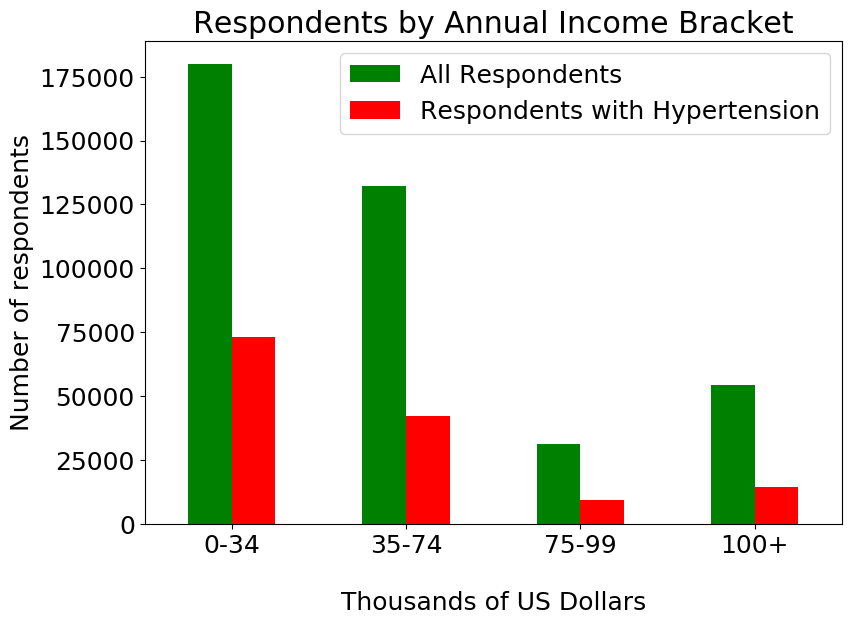

In [26]:
#Pandas handles bar charts very well!

income_column = 'Total combined family income'
income_codes = [10, 20, 31, 32]
income_labels = ['0-34', '35-74', '75-99', '100+']
color_list = ['g', 'r']

#count respondents by income bracket for the respondents with hypertension
df_income_HTN = df_HTN.groupby(income_column).size().reset_index()
df_income_HTN.columns = [income_column, 'Respondents with Hypertension']
df_income_HTN.set_index(income_column, inplace=True)

#filter for relevant income codes (excluding 'refused', 'don't know')
df_income_HTN = df_income_HTN.loc[df_income_HTN.index.isin(income_codes)]

#count respondents by income bracket for all respondents 
df_income_all = df_final.groupby(income_column).size().reset_index()
df_income_all.columns = [income_column, 'All Respondents']
df_income_all.set_index(income_column, inplace=True)

#filter for relevant income codes (excluding 'refused', 'don't know')
df_income_all = df_income_all.loc[df_income_all.index.isin(income_codes)]

df_income_plot = pd.merge(df_income_all, df_income_HTN, how = 'inner', on = income_column)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9,7))
fig.subplots_adjust(top = 0.80, hspace = 0.5)

df_income_plot.plot.bar(ax=axes, color = color_list)

axes.set_ylabel('Number of respondents')
axes.set_xlabel('\nThousands of US Dollars')
axes.set_title('Respondents by Annual Income Bracket')
axes.set_xticklabels(income_labels, rotation=0)

plt.savefig('HTN_Income.png', bbox_inches='tight', pad_inches=0.02)

plt.show()



It appears the people with hypertension roughly follows the same distribution as those without. Is the percent of people in each income bracket with hypertension the same?  

In [21]:
#create crosstab to produce numbers for validating plot

pd.crosstab(index = df_final[HTN_column], 
            columns = df_final['Total combined family income'], 
            normalize='columns',
            colnames = ['Total combined family income']).rename(
            columns={10: '0-34', 20: '35-74', 31:'75-99', 32: '100+' }, index={1: "No", 2: "Yes", 7:"Refused", 9:"Unknown"})
             

Total combined family income,0-34,35-74,30,75-99,100+,96,97,98,99
Ever told had hypertension,,,,,,,,,
No,0.593057,0.679445,0.788008,0.693967,0.733496,0.718268,0.665713,0.637220,0.605870
Yes,0.405755,0.319935,0.211429,0.305359,0.265917,0.278883,0.326701,0.357970,0.385203
Refused,0.000256,0.000219,0.000232,0.000353,0.000385,0.001885,0.005845,0.002356,0.005138
Unknown,0.000933,0.000401,0.000331,0.000321,0.000202,0.000964,0.001741,0.002454,0.003789


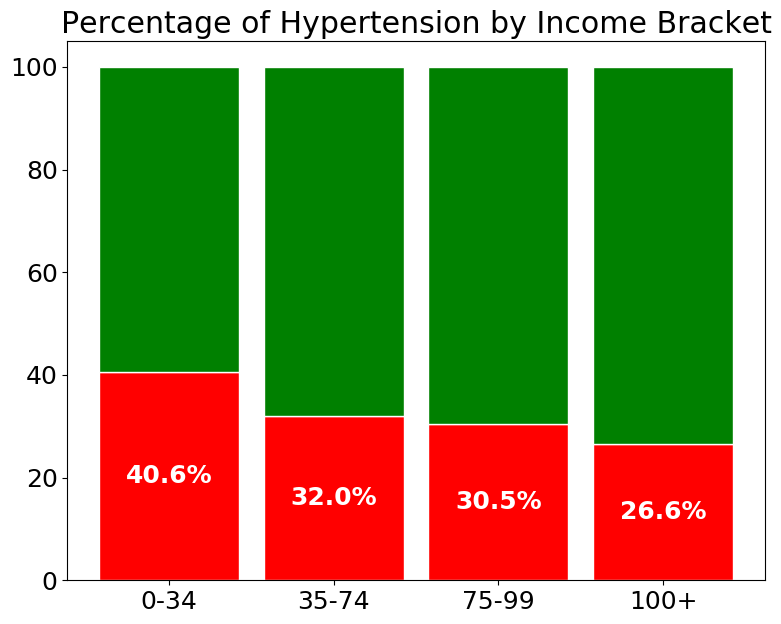

In [27]:
#Create stacked bar chart
#Special thanks to https://python-graph-gallery.com/13-percent-stacked-barplot/

plt.rc('font', **font)
barWidth = 0.85
#codes must be strings or will be plotted numerically causing uneven spacing on x-axis 
column_codes = ['10', '20', '31', '32']
column_labels = ['0-34', '35-74', '75-99', '100+']
fig, ax = plt.subplots(figsize=(9,7))

HTN_counts = df_income_HTN['Respondents with Hypertension']
#for more than 2 bars each array should be exclusive ie yes/no vs some/all
sample_counts = df_income_all['All Respondents']

totals = [i+j for i,j in zip(HTN_counts, sample_counts)]

#calculate the percentage of HTN in each income bracket
HTNBars = [i / j * 100 for i,j in zip(HTN_counts, sample_counts)]
#2 bars only
SampleSizeBars = [100-i for i in HTNBars]

# Plot HTN Bars
plt.bar(column_codes, HTNBars, color='r', edgecolor='white', width=barWidth)
# Plot SampleSize Bars
plt.bar(column_codes, SampleSizeBars, bottom=HTNBars, color='g', edgecolor='white', width=barWidth)

#add text annotation corresponding to the percentage of each segment
#middle of the bar is bar/2 
for xpos, ypos, yval in zip(column_codes, np.array(HTNBars)/2, HTNBars):
    plt.text(xpos, ypos, "%.1f"%yval + '%', ha="center", va="center", color = 'white', weight = 'bold', size = text_size)

plt.xticks(column_codes, column_labels, rotation=0)
axes.set_ylabel('Percent of respondents')
ax.set_title('Percentage of Hypertension by Income Bracket')
plt.savefig('HTN_Income_norm.png', bbox_inches='tight', pad_inches=0.02)
plt.show()



With the majority of people with hypertension in the lowest income bracket, can we learn more about their financial stability? The vast majority are above the poverty level, but given that $25,5750 defines the poverty level for a family of four, this implies that this is a vulnerable population. 

Above or below poverty threshold,1,2,9
Ever told had hypertension,,,
2,0.721446,0.138672,0.139882


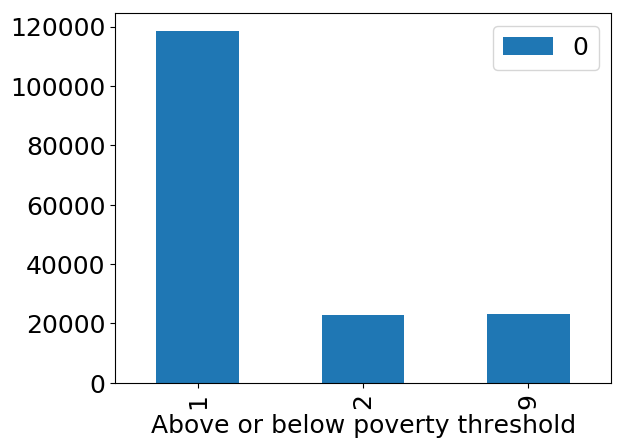

In [28]:
#count respondents under the poverty level
df_poverty = df_HTN.groupby('Above or below poverty threshold').size().reset_index()
df_poverty.set_index('Above or below poverty threshold', inplace=True)
df_poverty.plot.bar()

pd.crosstab(index = df_HTN[HTN_column], 
            columns = df_HTN['Above or below poverty threshold'], normalize='index')


### Hypertension and the ability to afford medical care
Scanning over the relevant columns in the dataset does not show any large proportion of people with hypertension not able to afford care.

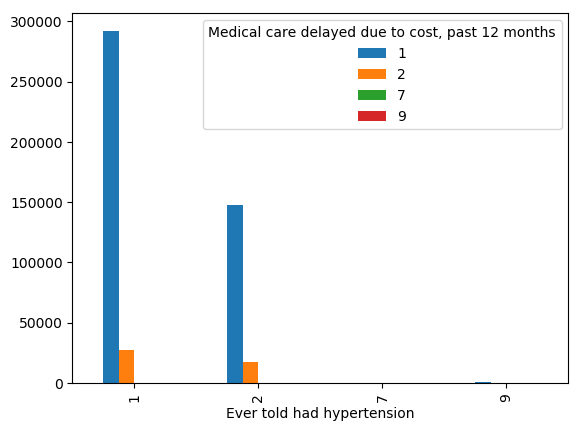

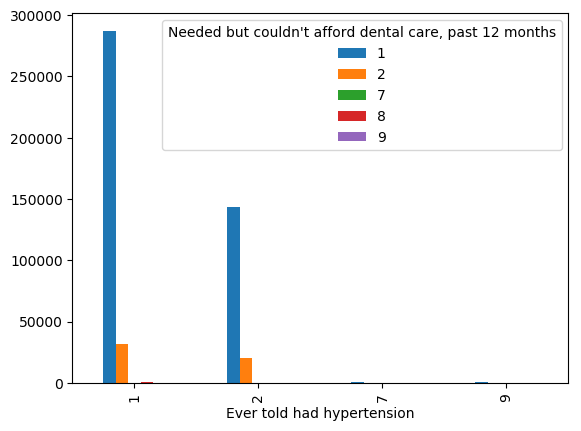

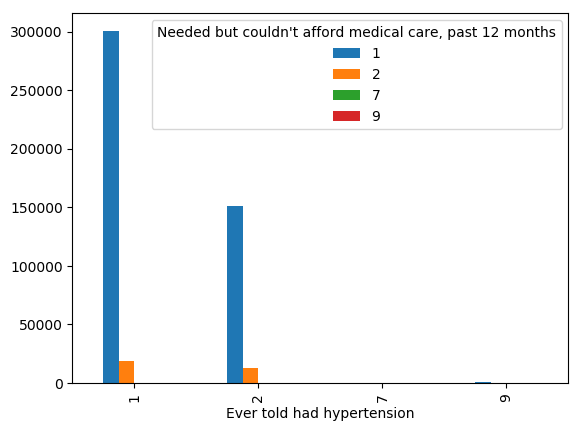

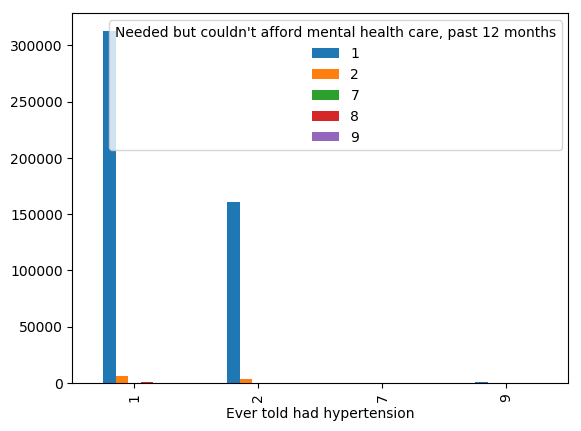

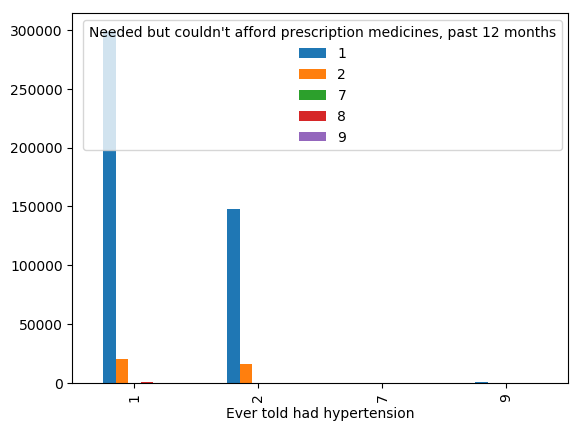

In [30]:
plt.style.use('default') 
care_columns = ["Medical care delayed due to cost, past 12 months", 
                "Needed but couldn't afford dental care, past 12 months",
"Needed but couldn't afford medical care, past 12 months",
"Needed but couldn't afford mental health care, past 12 months",
"Needed but couldn't afford prescription medicines, past 12 months"]

for care_column in care_columns:
    df = pd.crosstab(index = df_final[HTN_column], 
            columns = df_final[care_column])
    df.plot(kind='bar')




# Comorbidities
Is there a relationship between hypertension and other chronic medical conditions?

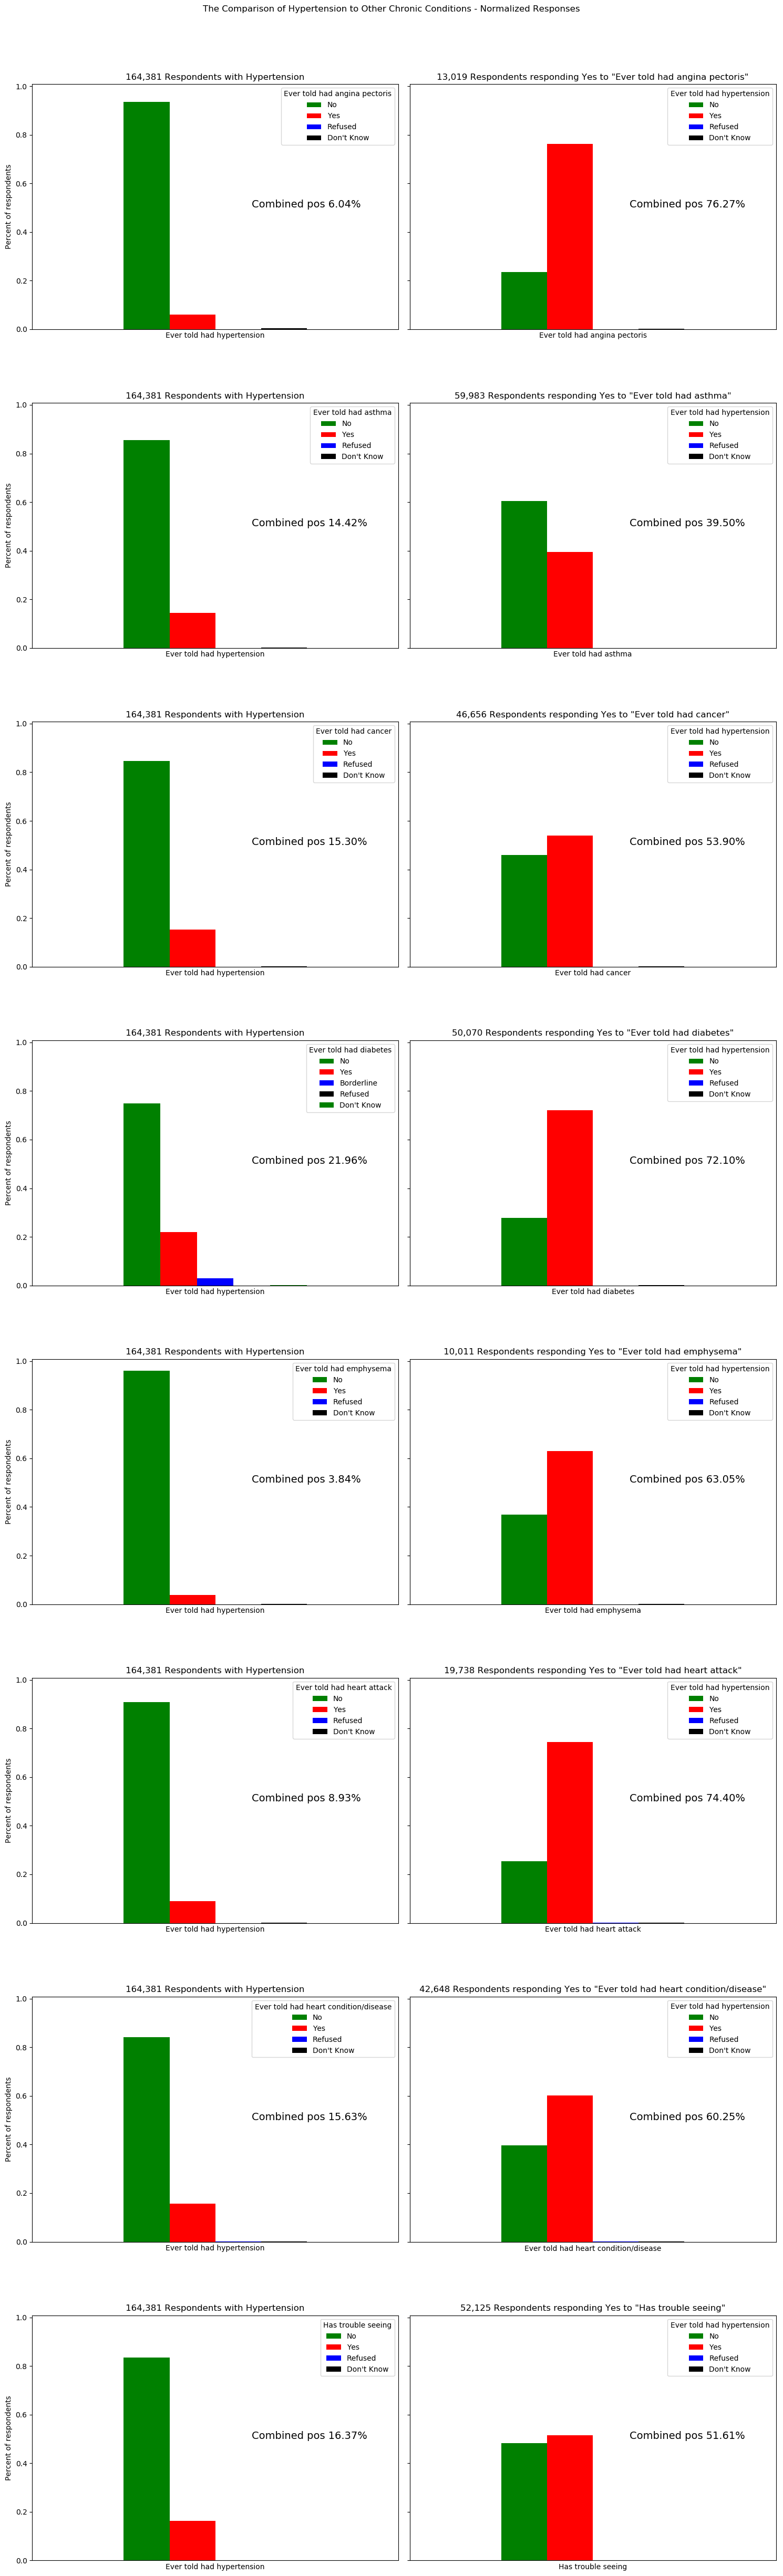

In [41]:
plt.style.use('default') 
color_list = ['g', 'r', 'b', 'k']
Codes_1279 = {1: "No", 2: "Yes", 3: "Borderline", 7:"Refused", 9:"Don't Know"}
comorbitity_features = ['Ever told had angina pectoris',
'Ever told had asthma', 
'Ever told had cancer', 
'Ever told had diabetes', 
'Ever told had emphysema', 
'Ever told had heart attack', 
'Ever told had heart condition/disease', 
'Has trouble seeing']
num_features = len(comorbitity_features)

#create dataframe of responses positive for hypertension
HTN_title = '{:,} Respondents with Hypertension'.format(len(df_HTN))

#create the space for the subplots
plt.close('all')
fig, axes = plt.subplots(nrows=num_features, ncols=2, figsize=(15,50),  sharey = True)
fig.suptitle('The Comparison of Hypertension to Other Chronic Conditions - Normalized Responses')
ax_col = 0

#enumerate over the list of comorbidities, creating comparison plots
for ax_row, comorbidity in enumerate(comorbitity_features):
    ax_col = 0
    df_posCmb = df_final[df_final[comorbidity] == 2]
    CMB_title = '{:,} Respondents responding Yes to "{}"'.format(len(df_posCmb), comorbidity)

    pd.crosstab(index=df_HTN[HTN_column], 
                columns=df_HTN[comorbidity], 
                colnames=[comorbidity],
                normalize='index').rename(columns=Codes_1279, index=Codes_1279).plot(
                ax=axes[ax_row, ax_col], kind ='bar', title = HTN_title, color=color_list)

    HTNandCMB = 'Combined pos {:.2%}'.format(len(df_HTN.loc[df_HTN[comorbidity]==2]) / len(df_HTN))
    axes[ax_row, ax_col].text(0.1, 0.5, HTNandCMB, size = 14)
    axes[ax_row, ax_col].set_ylabel('Percent of respondents')
    axes[ax_row, ax_col].set_xticks([])
    plt.tight_layout()
    
    ax_col += 1
    pd.crosstab(index=df_posCmb[comorbidity], 
                columns=df_posCmb[HTN_column], 
                colnames=[HTN_column],
                normalize='index').rename(columns=Codes_1279, index=Codes_1279).plot(
                ax=axes[ax_row, ax_col], kind ='bar', title = CMB_title, color=color_list)

    CMBandHTN = 'Combined pos {:.2%}'.format(len(df_posCmb.loc[df_posCmb[HTN_column]==2]) / len(df_posCmb))
    axes[ax_row, ax_col].text(0.1, 0.5, CMBandHTN, size = 14)
    axes[ax_row, ax_col].set_xticks([])
    plt.tight_layout()
    
fig.subplots_adjust(top = 0.95, hspace = 0.3)
fig.savefig('HTN_Comorbidities.png')
plt.show()

## Demographics

### Examine the relationship of hypertension and gender
Men have a higher prevalence of hypertension than women.

In [49]:
#review the data 
df_gender = pd.crosstab(index = df_final['Ever told had hypertension'], 
            columns = df_final['Sex'], 
            colnames = ['Gender']).rename(
            columns={2: "Female", 1: "Male"}, index={1: "No", 2: "Yes", 7:"Refused", 9:"Unknown"})

print(df_gender)

Gender                        Male  Female
Ever told had hypertension                
No                          131100  188589
Yes                          70481   93900
Refused                        139     169
Unknown                        192     180


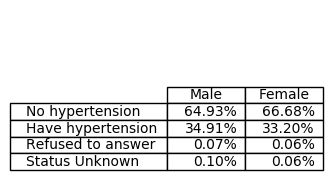

In [69]:
#since there are only two categories, the data will be presented in a simple table

df_gender_norm = pd.crosstab(index = df_final['Ever told had hypertension'], 
            columns = df_final['Sex'], 
            colnames = ['Gender'],
            normalize='columns').rename(
            columns={2: "Female", 1: "Male"}, 
    index={1: "No hypertension", 2: "Have hypertension", 7:"Refused to answer", 9:"Status Unknown"})

#df_gender_norm.style.format('{:.2%}') #couldn't get this to work for some reason
df_gender_norm['Male'] = pd.Series(["{0:.2f}%".format(val * 100) 
                                    for val in df_gender_norm['Male']], index = df_gender_norm.index)

df_gender_norm['Female'] = pd.Series(["{0:.2f}%".format(val * 100) 
                                    for val in df_gender_norm['Female']], index = df_gender_norm.index)

fig, ax = plt.subplots(figsize=(2, 1))
ax = plt.subplot(frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table(ax, df_gender_norm)  
plt.savefig('HTN_gender_table.png', bbox_inches='tight', pad_inches = 0.02)

### Examine the distribution of data by region
Prevalence is highest in the southeast, the "stroke belt"

In [74]:
#map the codes in the region column to understandable names
regions = {1:'Northeast',
 2:'North Central/Midwest', 
 3:'South',
 4:'West',
 8:'NO DATA IN ROUND',
 9:'Unknown'}

df_final['Region of residence'] = df_final['Region of residence'].map(regions)

In [75]:
#calculate the number of survey responses by region
df_reg = df_final.groupby('Region of residence').size().reset_index(name='Sample size')
#df_reg.set_index('Region of residence', inplace=True)
print(df_reg)

     Region of residence  Sample size
0  North Central/Midwest       110407
1              Northeast        86991
2                  South       172833
3                   West       114519


In [76]:
df_regionHTN = df_final.groupby(['Region of residence', 'Ever told had hypertension']).size().reset_index(name='Pos HTN')
df_regionHTN = df_regionHTN[df_regionHTN['Ever told had hypertension'] == 2][['Region of residence', 'Pos HTN']]
df_regionHTN.set_index('Region of residence', inplace=True)
print(df_regionHTN)

                       Pos HTN
Region of residence           
North Central/Midwest    37273
Northeast                27818
South                    64620
West                     34670


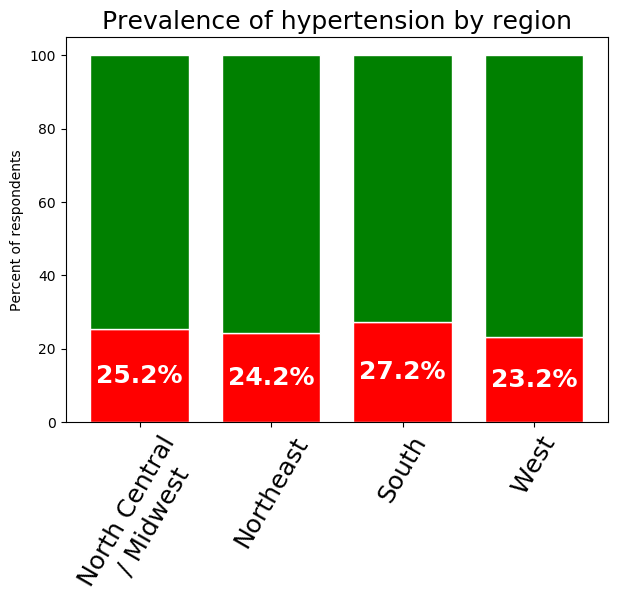

In [48]:
#Trying another way to create the stacked percentage bar graph
#Special thanks to https://python-graph-gallery.com/13-percent-stacked-barplot/
#but I think this code is a little less intuitive

barWidth = 0.75
region_codes = [0,1,2,3]
region_names = ('North Central\n / Midwest','Northeast','South','West')
fig, ax = plt.subplots(figsize=(7,5))

totals = [i+j for i,j in zip(df_regionHTN['Pos HTN'], df_reg['Sample size'])]
HTNBars = [i / j * 100 for i,j in zip(df_regionHTN['Pos HTN'], totals)]
SampleSizeBars = [i / j * 100 for i,j in zip(df_reg['Sample size'], totals)]

# Create HTN Bars
plt.bar(region_codes, HTNBars, color = 'r', edgecolor = 'white', width = barWidth)
# Create SampleSize Bars
plt.bar(region_codes, SampleSizeBars, bottom = HTNBars, color='g', edgecolor = 'white', width = barWidth)

#add text annotation corresponding to the percentage of each segment
#bottom half of the bars = y1 / 2
for xpos, ypos, yval in zip(region_codes, np.array(HTNBars)/2, HTNBars):
    plt.text(xpos, ypos, "%.1f"%yval + '%', ha="center", va="center", 
             size = text_size, color = 'white', weight = 'bold')


plt.xticks(region_codes, region_names, size = text_size, rotation = 60)
ax.set_ylabel('Percent of respondents')
ax.set_title('Prevalence of hypertension by region', size = text_size)
plt.savefig('HTN_region.png', bbox_inches='tight', pad_inches = 0.02)
plt.show()


### Race
Hispanic Ethnicity was coded separately with many sub-categories, so is plotted separately.
Both charts show differences in prevalence rates of hypertension by race.

In [80]:
dict_race = {100:"White", 200:"Black", 310:"Alaskan Native\n or American Indian", 
             411:"Chinese", 412:"Filipino", 416:"Asian Indian", 434:"Other Asian", 
             570:"Other Race", 580:"Unknown", 600:"Multiple Race"}

df_race = pd.crosstab(index = df_final['Ever told had hypertension'], 
            columns = df_final['Main Racial Background'], 
            colnames = ['Main Racial Background']).rename(
            columns=dict_race, index={1: "No", 2: "Yes", 7:"Refused", 9:"Unknown"})

df_race.sort_values(by='Main Racial Background', axis=1, ascending=False, inplace=True)
df_race

Main Racial Background,White,Unknown,Other Race,Other Asian,Multiple Race,Filipino,Chinese,Black,Asian Indian,Alaskan Native or American Indian
Ever told had hypertension,,,,,,,,,,
No,254516,700,2244,6119,894,3577,3871,40904,3605,3259
Yes,124719,350,607,2255,323,1875,1037,30748,710,1757
Refused,236,0,0,3,1,3,4,57,1,3
Unknown,309,2,4,13,0,3,8,29,1,3


In [92]:
dict_hisp = {20:"Mexican", 23:"Mexican-American", 30:"Puerto Rican", 
             40:"Cuban/Cuban American", 50:"Dominican (Republic)", 61:"Central or\n South American", 
             62:"Other Latin American", 63:"Other Spanish", 70:"Multiple Hispanic"}

df_hisp = pd.crosstab(index = df_final['Ever told had hypertension'], 
            columns = df_final['Hispanic ethnicity'], 
            colnames = ['Hispanic ethnicity']).rename(
            columns=dict_hisp, index={1: "No", 2: "Yes", 7:"Refused", 9:"Unknown"})

#drop the column indicating non-hispanic
df_hisp.drop([10, 64], axis=1, inplace=True)
df_hisp.sort_values(by='Hispanic ethnicity', axis=1, ascending=False, inplace=True)
df_hisp

Hispanic ethnicity,Puerto Rican,Other Spanish,Other Latin American,Multiple Hispanic,Mexican-American,Mexican,Dominican (Republic),Cuban/Cuban American,Central or South American
Ever told had hypertension,,,,,,,,,
No,5637,1627,112,836,12489,17529,1806,2608,8312
Yes,2594,811,45,274,4786,5290,788,1410,2052
Refused,3,1,0,0,10,3,1,1,5
Unknown,5,1,0,0,8,31,5,0,11


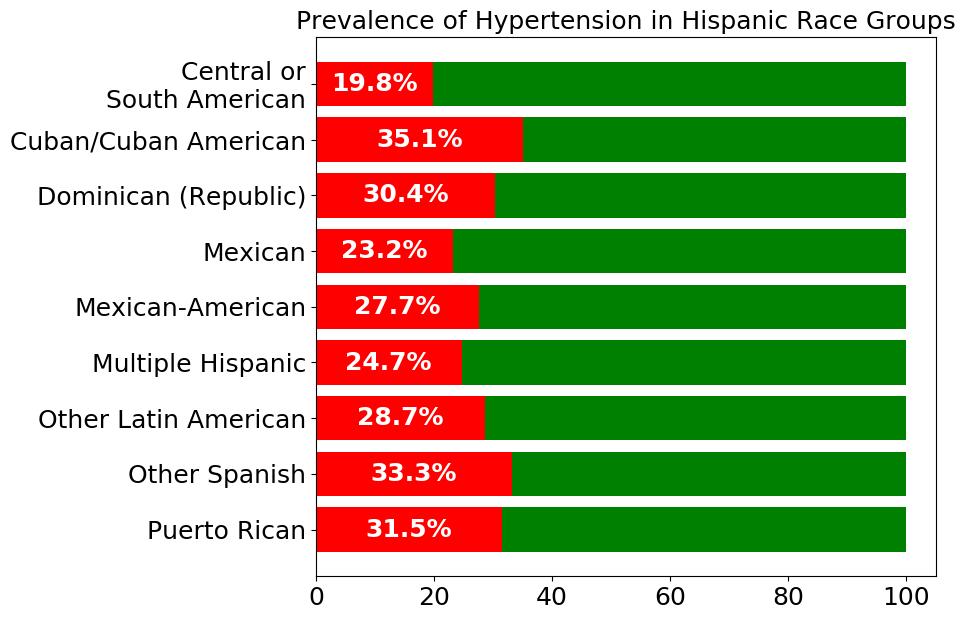

In [94]:
#warning - the order of x must match the order in the dataframe
x=sorted(dict_hisp.values(), reverse=True)
y1 = np.array(df_hisp.loc['Yes'])
y2 = np.array(df_hisp.loc['No'])

pct_2portion_plot(x, y1, y2, 0, 7, 8, 
                  "Prevalence of Hypertension in Hispanic Race Groups", "HTN_hispanic_race2", True)



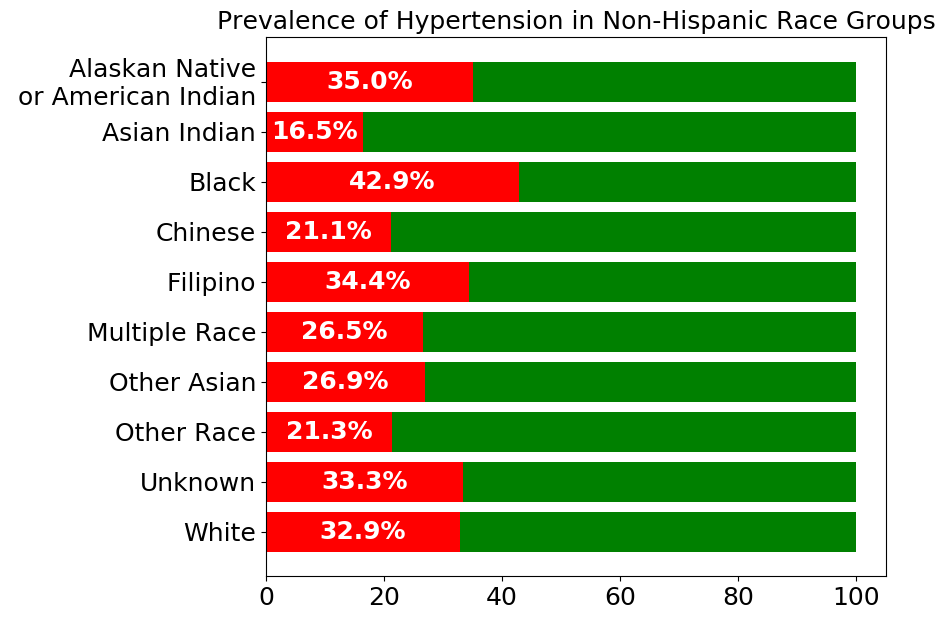

In [88]:
#warning - the order of x must match the order in the dataframe
x=sorted(dict_race.values(), reverse=True)
y1 = np.array(df_race.loc['Yes'])
y2 = np.array(df_race.loc['No'])
pct_2portion_plot(x, y1, y2, 0, 7, 8, 
                  "Prevalence of Hypertension in Non-Hispanic Race Groups", "HTN_non_hispanic_race2", True)



### Behavioral Factors
Is smoking correlated with hypertension?

In [106]:
dict_smoke = {11: "Current\nevery day\n smoker", 12: "Current\nsome day\n smoker", 20: "Former\nsmoker",
             30: "Never\nsmoked"}
df_smoker = pd.crosstab(index = df_final['Ever told had hypertension'], 
            columns = df_final['Cigarette smoking'], 
            colnames = ['Cigarette smoking']).rename(
            columns=dict_smoke, index={1: "No", 2: "Yes", 7:"Refused", 9:"Unknown"})

#drop the columns indicating unknown
df_smoker.drop([40, 90], axis=1, inplace=True)

df_smoker

Cigarette smoking,Current every day smoker,Current some day smoker,Former smoker,Never smoked
Ever told had hypertension,,,,
No,45253,13126,62512,197375
Yes,21792,5335,51442,85327
Refused,12,7,66,172
Unknown,57,12,85,196


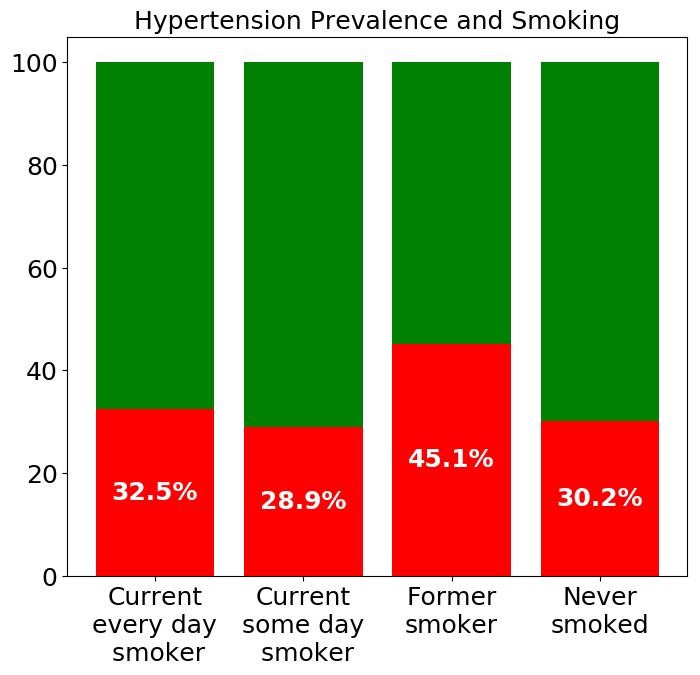

In [107]:
#warning - the order of x must match the order in the dataframe
x=sorted(dict_smoke.values())
y1 = np.array(df_smoker.loc['Yes'])
y2 = np.array(df_smoker.loc['No'])
pct_2portion_plot(x, y1, y2, 0, 7, 8, "Hypertension Prevalence and Smoking", "HTN_smoke", False)
